<p align="center">
    <img src="https://user-images.githubusercontent.com/46355364/220746807-669cdbc1-ac67-404c-b0bb-4a3d67d9931f.jpg" alt="Logo">
</center>

[![GitHub Sponsors](https://img.shields.io/badge/Sponsor_this_Project-grey?logo=github)](https://github.com/sponsors/JerBouma)
[![Documentation](https://img.shields.io/badge/Documentation-grey?logo=readme)](https://www.jeroenbouma.com/projects/financedatabase)
[![Supported Python Versions](https://img.shields.io/pypi/pyversions/financedatabase)](https://pypi.org/project/financedatabase/)
[![PYPI Version](https://img.shields.io/pypi/v/financedatabase)](https://pypi.org/project/financedatabase/)
[![PYPI Downloads](https://static.pepy.tech/badge/financedatabase/month)](https://pepy.tech/project/financedatabase)

The **FinanceDatabase** serves the role of providing anyone with any type of financial product categorisation entirely for free. To be able to achieve this, the FinanceDatabase relies on involvement from the community to add, edit and remove tickers over time. This is made easy enough that anyone, even with a lack of coding experience can contribute because of the usage of CSV files that can be manually edited. I'd like to invite you to go to the **[Contributing Guidelines](https://github.com/JerBouma/FinanceDatabase/blob/main/CONTRIBUTING.md)** to understand how you can help. Thank you!

As a private investor, the sheer amount of information that can be found on the internet is rather daunting. Trying to 
understand what type of companies or ETFs are available is incredibly challenging with there being millions of
companies and derivatives available on the market. Sure, the most traded companies and ETFs can quickly be found
simply because they are known to the public (for example, Microsoft, Tesla, S&P500 ETF or an All-World ETF). However, 
what else is out there is often unknown.

**This database tries to solve that**. It features 300.000+ symbols containing Equities, ETFs, Funds, Indices, 
Currencies, Cryptocurrencies and Money Markets. It therefore allows you to obtain a broad overview of sectors,
industries, types of investments and much more.

The aim of this database is explicitly _not_ to provide up-to-date fundamentals or stock data as those can be obtained 
with ease (with the help of this database) by using the [FinanceToolkit](https://github.com/JerBouma/FinanceToolkit). Instead, it gives insights into the products 
that exist in each country, industry and sector and gives the most essential information about each product. With 
this information, you can analyse specific areas of the financial world and/or find a product that is hard to find.


# Installation
To install the FinanceDatabase it simply requires the following:

```
pip install financedatabase -U
```

Then within Python use:

```python
import financedatabase as fd
```

In [1]:
import financedatabase as fd

Let's start off by obtaining the Equities dataset from the Finance Database.

In [2]:
equities = fd.Equities()

I want to see how many public companies exist in each sector in the Netherlands. Here, I can obtain all stocks that are located in the Netherlands with `country='Netherlands'`. I also include all exchanges by setting `exclude_exchanges=False`. This will give me all stocks that are listed on all exchanges. This is relevant because some stocks are listed on exchanges that are not the American exchanges which the parameter defaults to.

In [3]:
dutch_companies = equities.select(country="Netherlands", exclude_exchanges=False)

dutch_companies

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
09B.F,lastminute.com N.V.,lastminute.com N.V. operates in the online tra...,EUR,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure",FRA,Frankfurt Stock Exchange,Netherlands,NaN,Amsterdam,1097 JB,http://lmgroup.lastminute.com,Small Cap,NaN,NaN,NaN,NaN,NaN
0DI7.L,AFC Ajax NV,AFC Ajax NV operates a football club primarily...,EUR,NaN,NaN,NaN,LSE,London Stock Exchange (international),Netherlands,NaN,Amsterdam,1101 AX,http://www.ajax.nl,Micro Cap,NL0000018034,NaN,NaN,NaN,NaN
0DLI.L,Amsterdam Commodities N.V.,"Amsterdam Commodities N.V., together with its ...",EUR,NaN,NaN,NaN,LSE,London Stock Exchange (international),Netherlands,NaN,Rotterdam,3011 DD,http://www.acomo.nl,Small Cap,NaN,NaN,NaN,NaN,NaN
0DQK.L,Beter Bed Holding N.V.,Beter Bed Holding N.V. operates as a retail- a...,EUR,NaN,NaN,NaN,LSE,London Stock Exchange (international),Netherlands,NaN,Uden,5405 AR,http://www.beterbedholding.com,Micro Cap,NL0000339703,NaN,NaN,NaN,NaN
0E2F.L,Ctac N.V.,Ctac N.V. provides business and cloud integrat...,EUR,NaN,NaN,NaN,LSE,London Stock Exchange (international),Netherlands,NaN,'s-Hertogenbosch,5216 TZ,http://www.ctac.nl,Micro Cap,NL0000345577,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YDX.F,Yandex N.V.,"Yandex N.V., an internet and technology compan...",EUR,Communication Services,Telecommunication Services,Diversified Telecommunication Services,FRA,Frankfurt Stock Exchange,Netherlands,NaN,Schiphol,1118 BG,http://ir.yandex.com,Large Cap,NL0009805522,NaN,BBG001QCG273,BBG001QCG264,BBG001TBY593
YDX.MU,Yandex N.V.,"Yandex N.V., an internet and technology compan...",EUR,Communication Services,Telecommunication Services,Diversified Telecommunication Services,MUN,Munich Stock Exchange,Netherlands,NaN,Schiphol,1118 BG,http://ir.yandex.com,Large Cap,NL0009805522,NaN,BBG001QCG2C7,BBG001QCG264,BBG001TBY593
YDX.SG,Yandex N.V.,"Yandex N.V., an internet and technology compan...",EUR,Communication Services,Telecommunication Services,Diversified Telecommunication Services,STU,Stuttgart Stock Exchange,Netherlands,NaN,Schiphol,1118 BG,http://ir.yandex.com,Large Cap,NL0009805522,NaN,BBG001QCG2B8,BBG001QCG264,BBG001TBY593


As you can see this returns the same company multiple times. That makes sense, since a company can be listed on multiple exchanges. Filtering is applied by grouping by unique names and the sector.

In [4]:
unique_dutch_companies_per_sector = dutch_companies.groupby("sector").agg(
    {"name": "nunique"}
)

unique_dutch_companies_per_sector

,name
sector,
Communication Services,10
Consumer Discretionary,22
Consumer Staples,12
Energy,6
Financials,17
Health Care,16
Industrials,19
Information Technology,23
Materials,9


Now with this result, I can plot a pie chart to showcase the distribution of companies in each sector.

<Axes: title={'center': 'Number of companies per sector in the Netherlands'}>

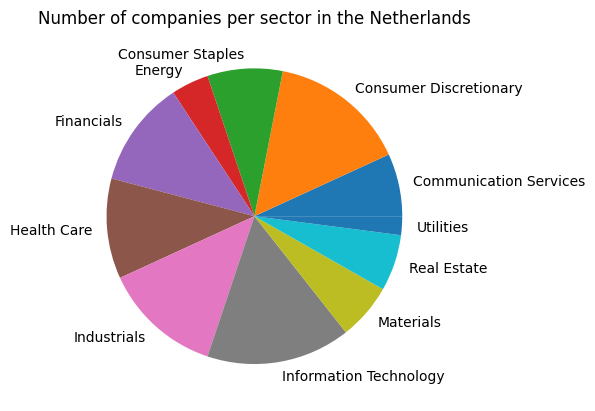

In [5]:
unique_dutch_companies_per_sector["name"].plot.pie(
    title="Number of companies per sector in the Netherlands",
    ylabel="",
)

If I want to delve deeper into individual companies in a specific sector and country I can do so by filtering on the `sector` and `country` columns. For example, I can filter on the `sector` column to obtain all companies in the `Financials` sector. I can then filter on the `country` column to obtain all companies in the `Financials` sector that are located in the `Netherlands`.

In [6]:
equities.select(country="Netherlands", sector="Financials", exclude_exchanges=False)

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
4IT.F,Intertrust N.V.,"Intertrust N.V. provides corporate, fund, capi...",EUR,Financials,Diversified Financials,Capital Markets,FRA,Frankfurt Stock Exchange,Netherlands,NaN,Amsterdam,1000 AZ,http://www.intertrustgroup.com,Small Cap,NaN,NaN,NaN,NaN,NaN
4IT.SG,Intertrust N.V.,"Intertrust N.V. provides corporate, fund, capi...",EUR,Financials,Diversified Financials,Capital Markets,STU,Stuttgart Stock Exchange,Netherlands,NaN,Amsterdam,1000 AZ,http://www.intertrustgroup.com,Small Cap,NaN,NaN,NaN,NaN,NaN
8FT.BE,Flow Traders N.V.,Flow Traders N.V. operates as a financial tech...,EUR,Financials,Diversified Financials,Capital Markets,BER,Berlin Stock Exchange,Netherlands,NaN,Amsterdam,1018 LL,http://www.flowtraders.com,Small Cap,NaN,NaN,NaN,NaN,NaN
8FT.F,Flow Traders N.V.,Flow Traders N.V. operates as a financial tech...,EUR,Financials,Diversified Financials,Capital Markets,FRA,Frankfurt Stock Exchange,Netherlands,NaN,Amsterdam,1018 LL,http://www.flowtraders.com,Small Cap,NaN,NaN,NaN,NaN,NaN
8FT.MU,Flow Traders N.V.,Flow Traders N.V. operates as a financial tech...,EUR,Financials,Diversified Financials,Capital Markets,MUN,Munich Stock Exchange,Netherlands,NaN,Amsterdam,1018 LL,http://www.flowtraders.com,Small Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RHCO,Readen Holding Corp.,"Readen Holding Corp., through its subsidiaries...",USD,Financials,Diversified Financials,Capital Markets,PNK,OTC Bulletin Board,Netherlands,NaN,Kortenhoef,1241 LZ,http://www.readenholdingcorp.com,Nano Cap,NaN,NaN,NaN,NaN,NaN
VA3.F,Van Lanschot Kempen N.V.,Van Lanschot Kempen N.V. provides financial se...,EUR,Financials,Banks,Banks,FRA,Frankfurt Stock Exchange,Netherlands,NaN,a¬Ä¬òs-Hertogenbosch,5211 JN,http://www.vanlanschotkempen.com,Small Cap,NL0000302636,NaN,BBG000D4J540,BBG000D4J452,BBG001SCWG18
VA3.SG,Van Lanschot Kempen N.V.,Van Lanschot Kempen N.V. provides financial se...,EUR,Financials,Banks,Banks,STU,Stuttgart Stock Exchange,Netherlands,NaN,a¬Ä¬òs-Hertogenbosch,5211 JN,http://www.vanlanschotkempen.com,Small Cap,NL0000302636,NaN,BBG000D4J693,BBG000D4J452,BBG001SCWG18
